In [7]:
import pandas as pd

raw = pd.read_csv("naver_shop_raw_all.csv")
melkin = pd.read_csv("naver_shop_melkin_only.csv")

# 키워드별 멜킨 노출 점유율
raw["is_melkin"] = raw.apply(lambda r: ("멜킨" in (str(r["brand"])+str(r["mallName"])+str(r["maker"])+str(r["title"]))), axis=1)

summary = raw.groupby("keyword").agg(
    n=("title","count"),
    melkin_n=("is_melkin","sum"),
    melkin_share=("is_melkin","mean"),
    price_mean=("lprice","mean"),
    price_median=("lprice","median"),
).reset_index()

summary["melkin_share"] = (summary["melkin_share"]*100).round(1)
summary["price_mean"] = summary["price_mean"].round(0)
summary["price_median"] = summary["price_median"].round(0)

summary.to_csv("naver_shop_keyword_summary.csv", index=False, encoding="utf-8-sig")
print(summary.sort_values("melkin_share", ascending=False).to_string(index=False))


PermissionError: [Errno 13] Permission denied: 'naver_shop_keyword_summary.csv'

In [23]:
import pandas as pd

raw = pd.read_csv("naver_shop_raw_all.csv")
raw["is_melkin"] = raw.apply(lambda r: ("멜킨" in (str(r["brand"])+str(r["mallName"])+str(r["maker"])+str(r["title"]))), axis=1)

summary = raw.groupby("keyword").agg(
    total=("title","count"),
    melkin_n=("is_melkin","sum"),
).reset_index()

summary["melkin_share(%)"] = (summary["melkin_n"] / summary["total"] * 100).round(2)

print(summary.sort_values("melkin_share(%)", ascending=False).to_string(index=False))


keyword  total  melkin_n  melkin_share(%)
     아령    499        53            10.62
     덤벨    500        53            10.60
  실내자전거    500        52            10.40
   요가매트    500        29             5.80
  스핀바이크    498        27             5.42
     바벨    500        24             4.80
  홈트 기구    500        23             4.60
    폼롤러    500        19             3.80
     철봉    481        14             2.91
    풀업바    497        14             2.82
    케틀벨    497        13             2.62
   마사지건    500         7             1.40
   치닝디핑    500         7             1.40


In [24]:
melkin = raw[raw["is_melkin"] == True]
market_price = raw["lprice"].median()
melkin_price = melkin["lprice"].median()

print("시장 중앙값:", market_price)
print("멜킨 중앙값:", melkin_price)
print("가격 포지션 차이:", melkin_price - market_price)


시장 중앙값: 41450.0
멜킨 중앙값: 39000.0
가격 포지션 차이: -2450.0


In [25]:
melkin_cat = melkin.groupby("category3").size().reset_index(name="count")
melkin_cat = melkin_cat.sort_values("count", ascending=False)
print(melkin_cat.to_string(index=False))


category3  count
       아령    106
    헬스사이클     79
    웨이트기구     75
     요가매트     29
     헬스소품     19
      케틀벨     13
     마사지건      7
      스텝퍼      6
     로잉머신      1


In [26]:
market_median = raw["lprice"].median()
melkin_median = raw[raw["is_melkin"] == True]["lprice"].median()

print("시장 중앙값:", market_median)
print("멜킨 중앙값:", melkin_median)
print("차이:", melkin_median - market_median)


시장 중앙값: 41450.0
멜킨 중앙값: 39000.0
차이: -2450.0


In [27]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.ticker as ticker

def set_report_style():
    # 한글 폰트 (Windows)
    plt.rcParams["font.family"] = "Malgun Gothic"
    plt.rcParams["axes.unicode_minus"] = False

    # 전체 톤 통일
    plt.rcParams["figure.dpi"] = 140
    plt.rcParams["savefig.dpi"] = 200
    plt.rcParams["figure.figsize"] = (9, 5.2)
    plt.rcParams["font.size"] = 11
    plt.rcParams["axes.titlesize"] = 14
    plt.rcParams["axes.titleweight"] = "bold"

    # 라인/스파인 정리(깔끔하게)
    plt.rcParams["axes.spines.top"] = False
    plt.rcParams["axes.spines.right"] = False

def format_thousands(ax, axis="x"):
    fmt = ticker.FuncFormatter(lambda x, pos: f"{int(x):,}")
    if axis == "x":
        ax.xaxis.set_major_formatter(fmt)
    else:
        ax.yaxis.set_major_formatter(fmt)

set_report_style()


키워드별 멜킨 노출 점유율(%)

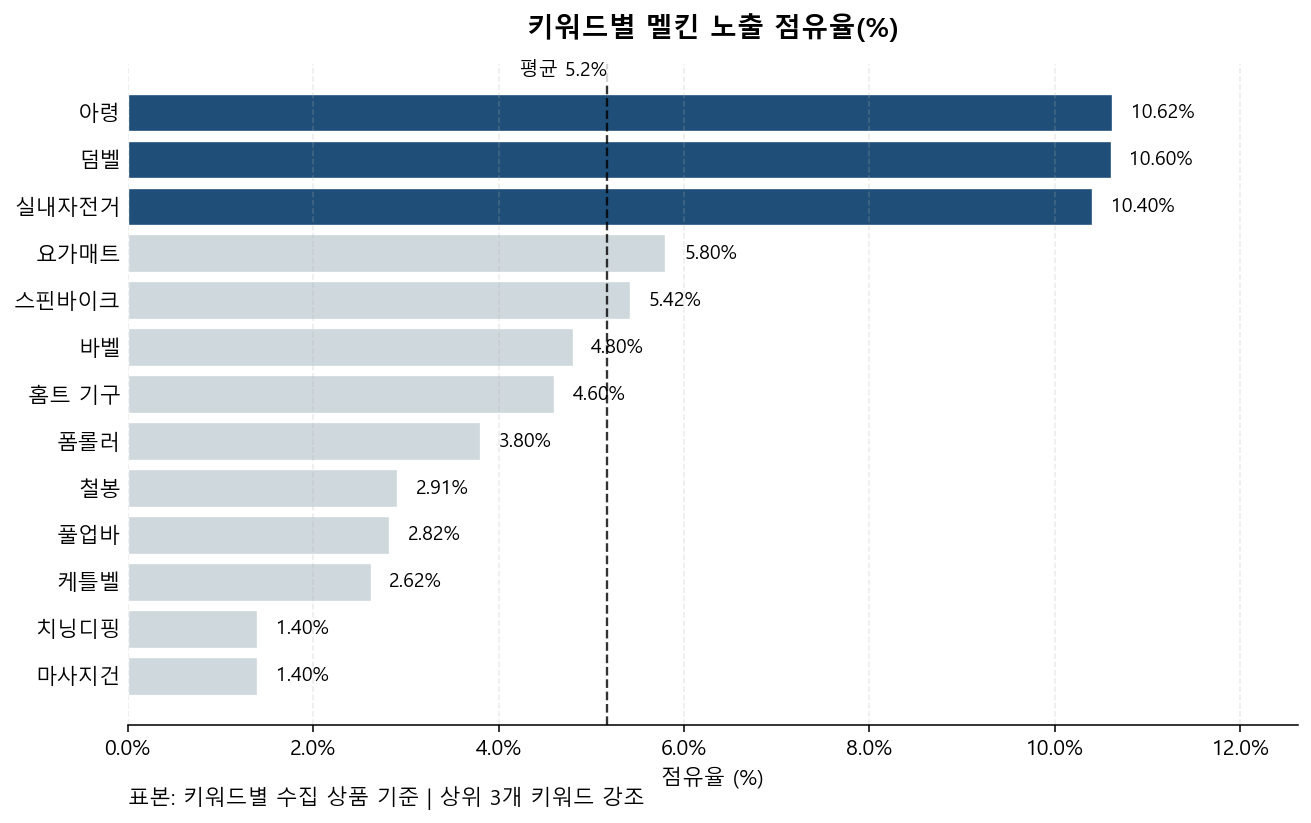

In [28]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

def set_report_style():
    # 한글(Windows). Mac이면 'AppleGothic'으로 바꿔줘
    plt.rcParams["font.family"] = "Malgun Gothic"
    plt.rcParams["axes.unicode_minus"] = False

    # 보고서 톤
    plt.rcParams["figure.dpi"] = 140
    plt.rcParams["savefig.dpi"] = 200
    plt.rcParams["font.size"] = 11
    plt.rcParams["axes.titlesize"] = 14
    plt.rcParams["axes.titleweight"] = "bold"

    # 깔끔한 스파인
    plt.rcParams["axes.spines.top"] = False
    plt.rcParams["axes.spines.right"] = False

set_report_style()

def plot_melkin_share_by_keyword(
    summary,
    top_n_highlight=3,
    title="키워드별 멜킨 노출 점유율(%)",
    save_path="01_keyword_share.png"
):
    df = summary.sort_values("melkin_share(%)", ascending=True).copy()
    avg = df["melkin_share(%)"].mean()

    fig, ax = plt.subplots(figsize=(9.5, 6))

    # --- 색상: 상위 N개만 강조 ---
    top_threshold = df["melkin_share(%)"].nlargest(top_n_highlight).min()
    colors = ["#1f4e79" if v >= top_threshold else "#cfd8dc" for v in df["melkin_share(%)"]]

    bars = ax.barh(df["keyword"], df["melkin_share(%)"], color=colors, edgecolor="white", linewidth=0.7)

    # --- 제목/축 ---
    ax.set_title(title, pad=14)
    ax.set_xlabel("점유율 (%)")

    # x축 % 표기
    ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f%%'))

    # --- 그리드 (은은하게) ---
    ax.grid(axis="x", linestyle="--", alpha=0.25)

    # --- 평균선(Reference line) ---
    ax.axvline(avg, color="#000000", linestyle="--", alpha=0.8, linewidth=1.2)

    # 평균선 라벨 위치(그래프 상단 쪽)
    y_top = len(df) - 0.3
    ax.text(
        avg, y_top,
        f"평균 {avg:.1f}%",
        color="#000000",
        ha="right",
        va="bottom",
        fontsize=10,
        bbox=dict(boxstyle="round,pad=0.25", facecolor="white", edgecolor="none", alpha=0.8)
    )

    # --- 값 라벨 (막대 끝에) ---
    for b in bars:
        w = b.get_width()
        ax.text(
            w + 0.2, b.get_y() + b.get_height()/2,
            f"{w:.2f}%",
            va="center",
            fontsize=10,
            color="#000000"
        )

    # --- 여백/축 정리 ---
    ax.spines["left"].set_visible(False)
    ax.tick_params(axis="y", length=0)   # y축 눈금선 제거
    ax.set_xlim(0, max(df["melkin_share(%)"].max() + 2, avg + 2))  # 오른쪽 여유

    # 설명(캡션 느낌) - 선택
    ax.text(
        0, -0.12,
        f"표본: 키워드별 수집 상품 기준 | 상위 {top_n_highlight}개 키워드 강조",
        transform=ax.transAxes,
        fontsize=11,
        color="#000000"
    )

    plt.tight_layout()

    # 저장
    if save_path:
        fig.savefig(save_path, bbox_inches="tight")
    return fig

# 실행
fig = plot_melkin_share_by_keyword(summary, top_n_highlight=3, save_path="01_keyword_share.png")
plt.show()


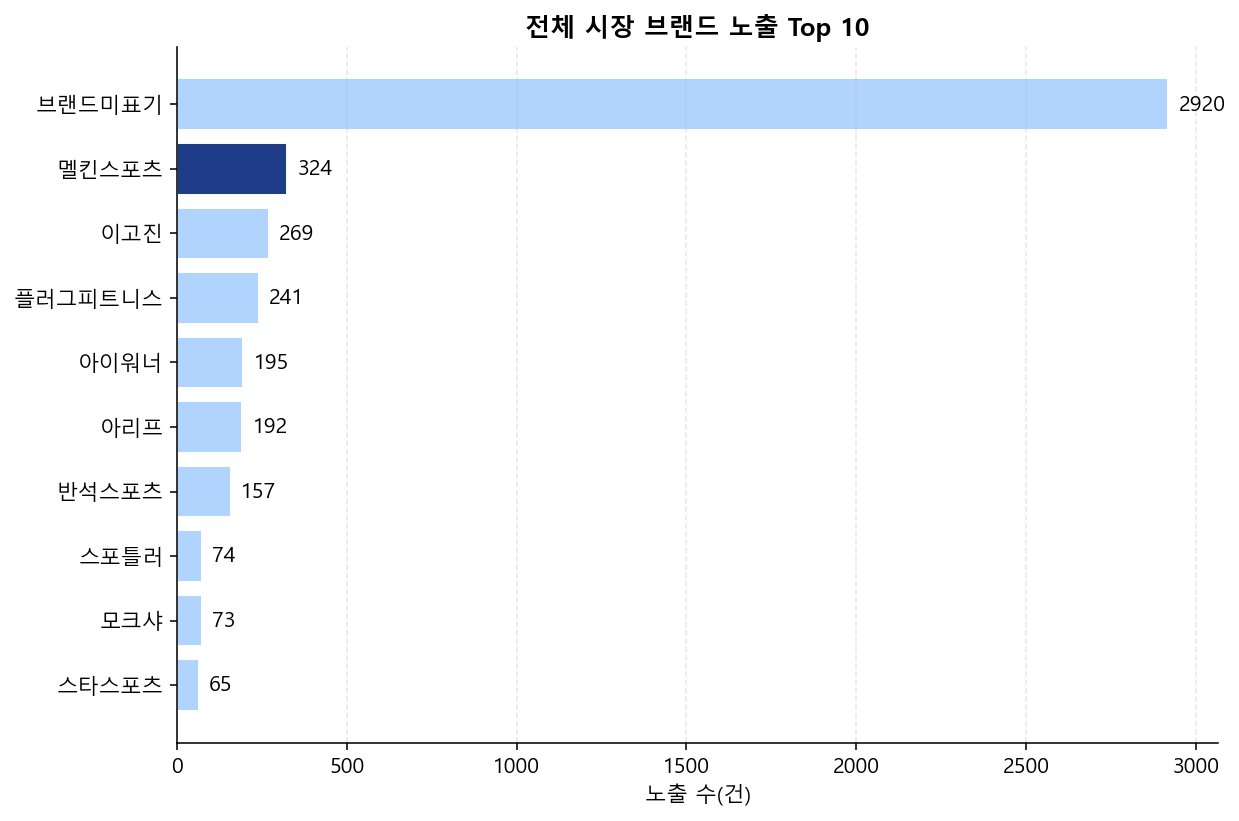

In [ ]:
import matplotlib.pyplot as plt

def plot_top_brands_pretty(raw, top_n=10, save_path=None):
    tmp = raw.copy()
    tmp["brand_clean"] = tmp["brand"].fillna("").replace("", "브랜드미표기")

    top = (
        tmp.groupby("brand_clean")["productId"]
        .count()
        .sort_values(ascending=False)
        .head(top_n)
    )

    # 정렬 (위에서 1위 보이게)
    top = top.sort_values(ascending=True)

    fig, ax = plt.subplots(figsize=(9, 6))

    # 색상 지정 (멜킨 강조)
    colors = []
    for brand in top.index:
        if "멜킨" in brand:
            colors.append("#1f3c88")
        else:
            colors.append("#b1d4ff")

    bars = ax.barh(top.index, top.values, color=colors, edgecolor="white")

    ax.set_title(f"전체 시장 브랜드 노출 Top {top_n}", fontsize=13, fontweight="bold")
    ax.set_xlabel("노출 수(건)")
    ax.grid(axis="x", linestyle="--", alpha=0.3)

    # 숫자 라벨
    for b in bars:
        w = b.get_width()
        ax.text(
            w + max(top.values) * 0.01,
            b.get_y() + b.get_height() / 2,
            f"{int(w)}",
            va="center",
            fontsize=11,
        )

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    plt.tight_layout()

    # 저장
    if save_path:
        fig.savefig(save_path, bbox_inches="tight", dpi=300)

    return fig

fig = plot_top_brands_pretty(raw, top_n=10, save_path="brand_frequency.png")
plt.show()


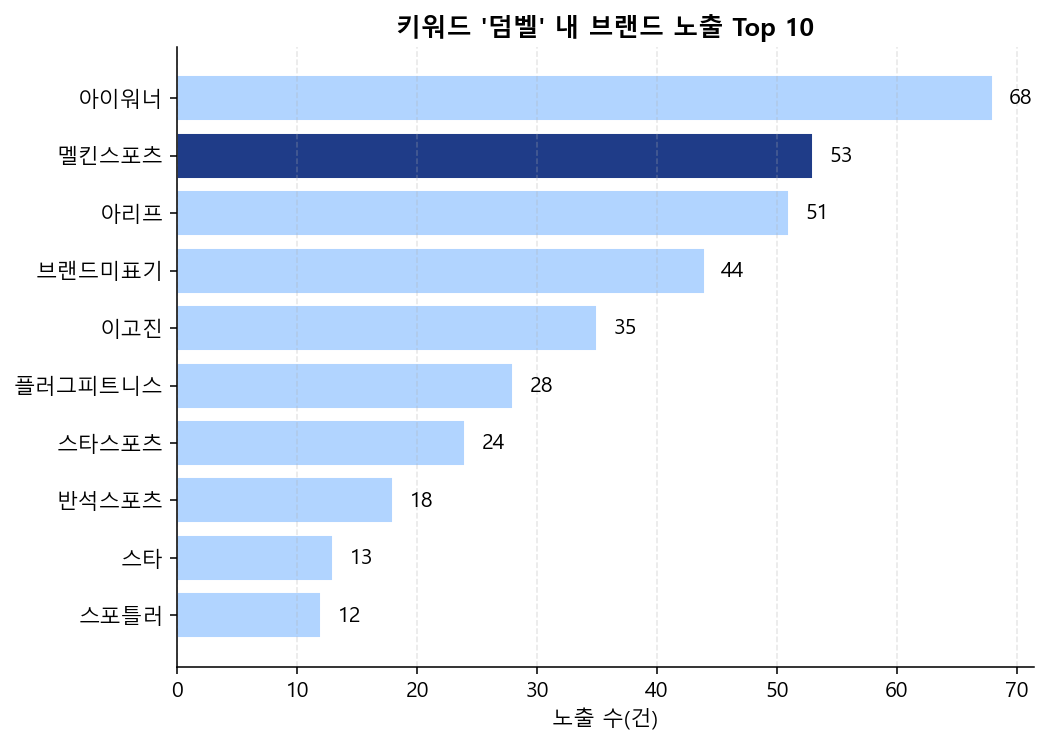

In [40]:
import matplotlib.pyplot as plt

def plot_top_brands_in_keyword_pretty(raw, keyword="덤벨", top_n=10, save_path=None):
    df = raw[raw["keyword"] == keyword].copy()
    df["brand_clean"] = df["brand"].fillna("").replace("", "브랜드미표기")

    top = (
        df.groupby("brand_clean")["productId"]
        .count()
        .sort_values(ascending=False)
        .head(top_n)
        .sort_values(ascending=True)
    )

    fig, ax = plt.subplots(figsize=(9,6))

    # 🔹 색상 설정
    colors = []
    for brand in top.index:
        if "멜킨" in brand:
            colors.append("#1f3c88")   # 멜킨 강조
        else:
            colors.append("#b1d4ff")   # 나머지 연회색

    bars = ax.barh(top.index, top.values,
                   color=colors,
                   edgecolor="white")

    ax.set_title(f"키워드 '{keyword}' 내 브랜드 노출 Top {top_n}",
                 fontsize=13,
                 fontweight="bold")

    ax.set_xlabel("노출 수(건)")
    ax.grid(axis="x", linestyle="--", alpha=0.3)

    # 숫자 라벨
    for b in bars:
        w = b.get_width()
        ax.text(w + max(top.values)*0.02,
                b.get_y() + b.get_height()/2,
                f"{int(w)}",
                va="center",
                fontsize=11)

    # 테두리 정리
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    
        # 저장
    if save_path:
        fig.savefig(save_path, bbox_inches="tight", dpi=300)


    plt.tight_layout()
    return fig


fig = plot_top_brands_in_keyword_pretty(raw, keyword="덤벨", top_n=10, save_path="03_dumbell_top10.png")
plt.show()


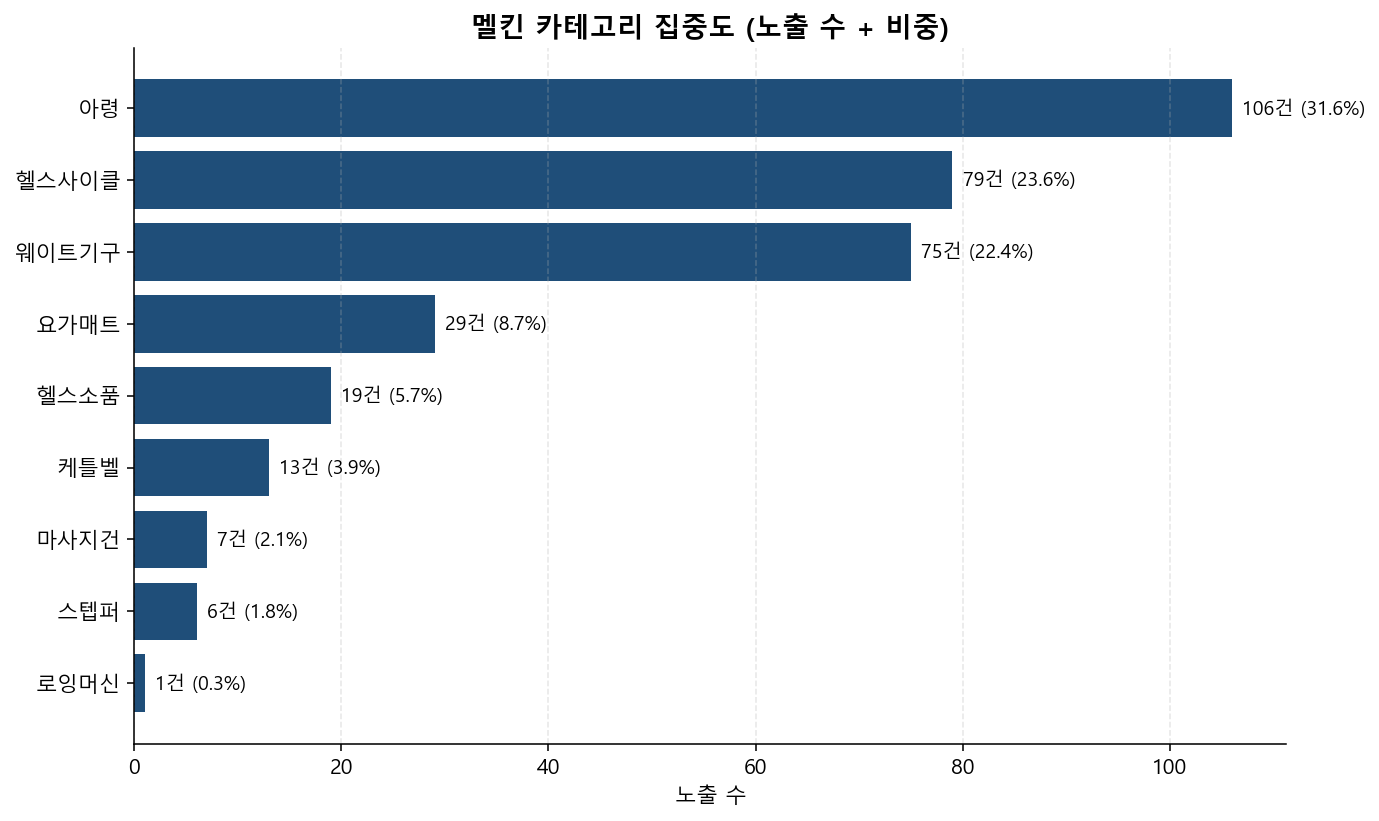

In [43]:
def plot_melkin_category_detailed(melkin, save_path=None):
    cat = melkin.groupby("category3").size().sort_values(ascending=False).head(10)
    total = cat.sum()
    ratio = (cat / total * 100).round(1)

    fig, ax = plt.subplots(figsize=(10,6))

    bars = ax.barh(cat.index[::-1], cat.values[::-1], color="#1f4e79")

    ax.set_title("멜킨 카테고리 집중도 (노출 수 + 비중)")
    ax.set_xlabel("노출 수")
    ax.grid(axis="x", linestyle="--", alpha=0.3)

    for i, b in enumerate(bars):
        w = b.get_width()
        ax.text(
            w + 1,
            b.get_y() + b.get_height()/2,
            f"{int(w)}건 ({ratio.iloc[::-1].iloc[i]}%)",
            va="center",
            fontsize=10
        )

    plt.tight_layout()
    
            # 저장
    if save_path:
        fig.savefig(save_path, bbox_inches="tight", dpi=300)
    return fig

fig = plot_melkin_category_detailed(melkin, save_path="04_melkin_focus.png")
plt.show()


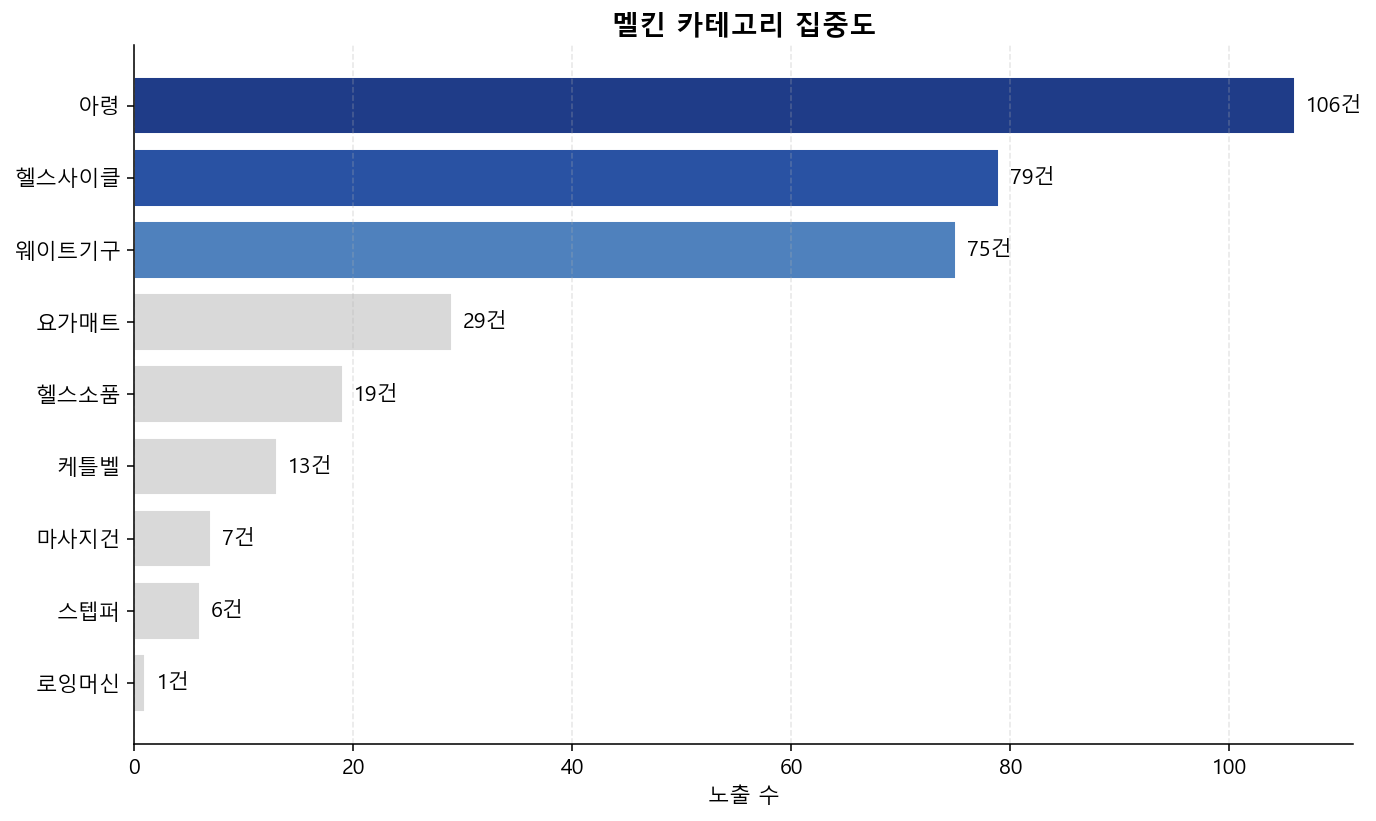

In [44]:
def plot_melkin_category_color(melkin, save_path=None):
    cat = melkin.groupby("category3").size().sort_values(ascending=False).head(10)
    total = cat.sum()
    ratio = (cat / total * 100)
    cumulative = ratio.cumsum()

    fig, ax1 = plt.subplots(figsize=(10,6))

    # 색상 지정
    colors = []
    for i in range(len(cat)):
        if i == 0:
            colors.append("#1f3c88")  # 1위
        elif i == 1:
            colors.append("#2952a3")  # 2위
        elif i == 2:
            colors.append("#4f81bd")  # 3위
        else:
            colors.append("#d9d9d9")  # 나머지

    bars = ax1.barh(cat.index[::-1], cat.values[::-1],
                    color=colors[::-1],
                    edgecolor="white")

    ax1.set_title("멜킨 카테고리 집중도")
    ax1.set_xlabel("노출 수")
    ax1.grid(axis="x", linestyle="--", alpha=0.3)

    # 값 라벨
    for b in bars:
        w = b.get_width()
        ax1.text(w + 1,
                 b.get_y()+b.get_height()/2,
                 f"{int(w)}건",
                 va="center")


    plt.tight_layout()
    
            # 저장
    if save_path:
        fig.savefig(save_path, bbox_inches="tight", dpi=300)
    return fig

fig = plot_melkin_category_color(melkin, save_path="05_melkin_focus2.png")
plt.show()


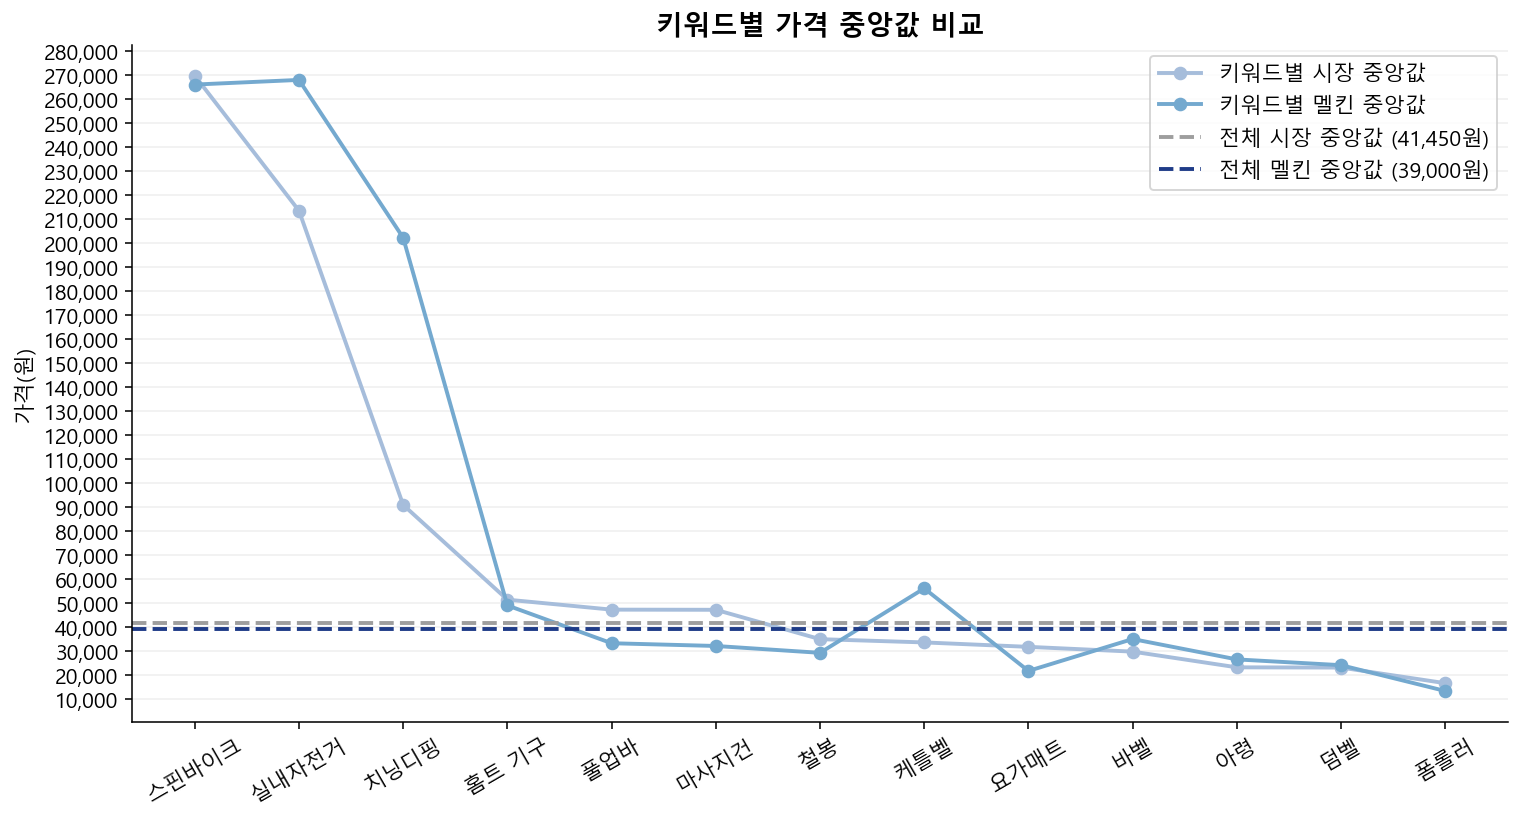

In [45]:
import matplotlib.ticker as ticker

def plot_keyword_median_prices_with_total(raw, melkin, summary, save_path=None):
    market_med = raw.groupby("keyword")["lprice"].median()
    melkin_med = melkin.groupby("keyword")["lprice"].median()

    df = summary[["keyword"]].copy()
    df["market_median"] = df["keyword"].map(market_med)
    df["melkin_median"] = df["keyword"].map(melkin_med)

    df = df.sort_values("market_median", ascending=False)

    total_market_median = raw["lprice"].median()
    total_melkin_median = melkin["lprice"].median()

    fig, ax = plt.subplots(figsize=(11,6))

    # 키워드별 선 (연한 색)
    ax.plot(df["keyword"], df["market_median"],
            marker="o", linewidth=2,
            color="#a6bddb",
            label="키워드별 시장 중앙값")

    ax.plot(df["keyword"], df["melkin_median"],
            marker="o", linewidth=2,
            color="#74a9cf",
            label="키워드별 멜킨 중앙값")

    # 전체 중앙값 수평선
    ax.axhline(total_market_median,
               linestyle="--",
               linewidth=2,
               color="#9e9e9e",
               label=f"전체 시장 중앙값 ({int(total_market_median):,}원)")

    ax.axhline(total_melkin_median,
               linestyle="--",
               linewidth=2,
               color="#1f3c88",
               label=f"전체 멜킨 중앙값 ({int(total_melkin_median):,}원)")

    ax.set_title("키워드별 가격 중앙값 비교")
    ax.set_ylabel("가격(원)")

    # ✅ y축을 10,000원 단위로 정리
    ax.yaxis.set_major_locator(ticker.MultipleLocator(10000))
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{int(x):,}"))

    ax.tick_params(axis="x", rotation=30)
    ax.grid(axis="y", alpha=0.2)
    ax.legend()

    plt.tight_layout()
    
                # 저장
    if save_path:
        fig.savefig(save_path, bbox_inches="tight", dpi=300)
    return fig


fig = plot_keyword_median_prices_with_total(raw, melkin, summary, save_path="06_melkin_price.png")
plt.show()


In [48]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def plot_keyword_median_prices_with_total(
    raw, melkin, summary, save_path=None,
    market_color="#2E86C1",        # 시장선 색
    melkin_color="#E74C3C",        # 멜킨선 색
    total_market_color="#9e9e9e",  # 전체 시장 중앙값 선 색
    total_melkin_color="#1f3c88"   # 전체 멜킨 중앙값 선 색
):

    market_med = raw.groupby("keyword")["lprice"].median()
    melkin_med = melkin.groupby("keyword")["lprice"].median()

    df = summary[["keyword"]].copy()
    df["market_median"] = df["keyword"].map(market_med)
    df["melkin_median"] = df["keyword"].map(melkin_med)

    df = df.sort_values("market_median", ascending=False)

    total_market_median = raw["lprice"].median()
    total_melkin_median = melkin["lprice"].median()

    fig, ax = plt.subplots(figsize=(10,6))

    # 🔹 키워드별 선
    ax.plot(df["keyword"], df["market_median"],
            marker="o",
            color=market_color,
            linewidth=2,
            label="시장 중앙값")

    ax.plot(df["keyword"], df["melkin_median"],
            marker="o",
            color=melkin_color,
            linewidth=2,
            label="멜킨 중앙값")

    # 🔹 전체 중앙값 선
    ax.axhline(total_market_median,
               linestyle="--",
               linewidth=2,
               color=total_market_color,
               label=f"전체 시장 중앙값 ({int(total_market_median):,}원)")

    ax.axhline(total_melkin_median,
               linestyle="--",
               linewidth=2,
               color=total_melkin_color,
               label=f"전체 멜킨 중앙값 ({int(total_melkin_median):,}원)")

    ax.set_title("키워드별 가격 중앙값 비교")
    ax.set_ylabel("가격(원)")

    ax.yaxis.set_major_locator(ticker.MultipleLocator(50000))
    ax.yaxis.set_major_formatter(
        ticker.FuncFormatter(lambda x, pos: f"{int(x):,}")
    )

    ax.tick_params(axis="x", rotation=30)
    ax.legend()
    ax.grid(axis="y", alpha=0.2)

    plt.tight_layout()
    
                    # 저장
    if save_path:
        fig.savefig(save_path, bbox_inches="tight", dpi=300)
    return fig


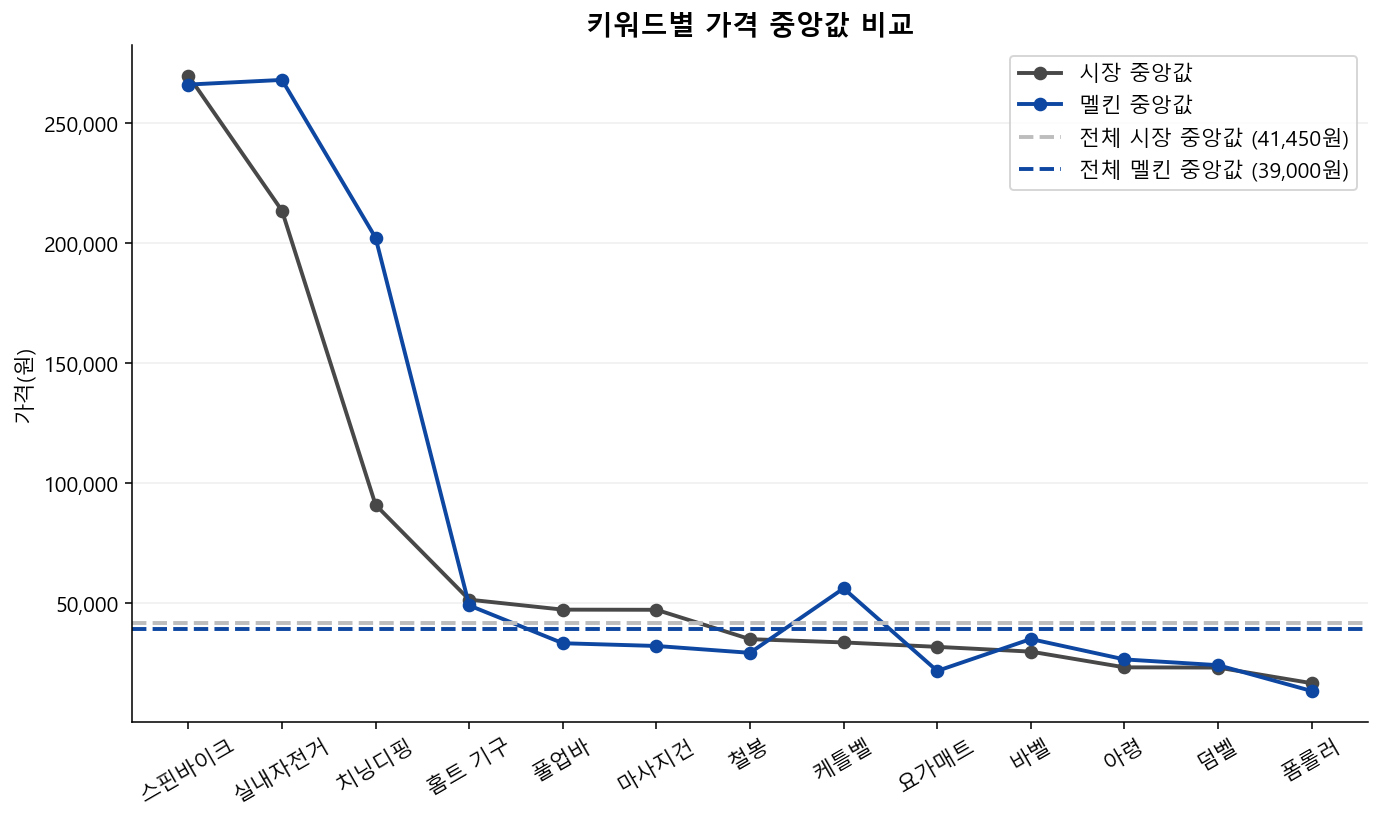

In [51]:
fig = plot_keyword_median_prices_with_total(
    raw, melkin, summary, save_path="07_melkin_price2.png",
    market_color="#484848",      # 초록
    melkin_color="#0D47A1",      # 오렌지
    total_market_color="#BDBDBD",
    total_melkin_color="#0D47A1"
)

plt.show()
